In [6]:
import tensorflow as tf 
from d2l import tensorflow as d2l
from util.MLPutils import Animator3D, IteratorEx
import pandas as pd

In [7]:
num_outputs, num_hiddens1, num_hiddens2 = 10, 256, 256

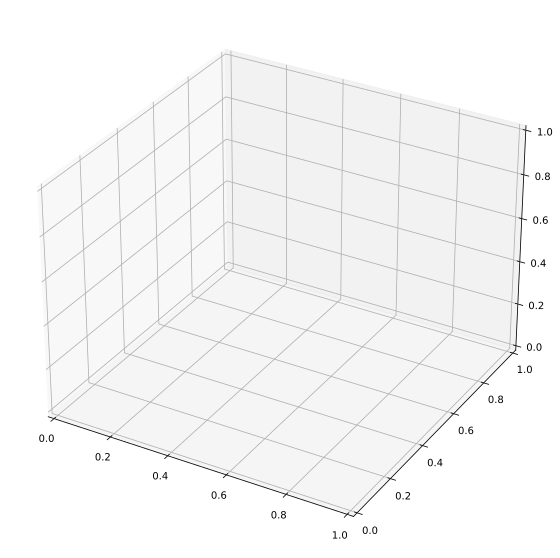

In [8]:
animator = Animator3D(xlabel = 'dropout1',ylabel = 'dropout2',
                      xlim = [0, 1], ylim =[0, 1],zlim = [0, 2.5] , 
                      legend=['train loss', 'train acc', 'test acc'])

In [9]:
def train_ch3( train_iter, test_iter, loss, num_epochs, updater, dropout1, dropout2):
    net = tf.keras.models.Sequential(([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_hiddens1, activation=tf.nn.relu),
    tf.keras.layers.Dropout(dropout1),
    tf.keras.layers.Dense(num_hiddens2, activation=tf.nn.relu),
    tf.keras.layers.Dropout(dropout2),
    tf.keras.layers.Dense(num_outputs)
    ]))
    
    epoch_gen = IteratorEx(range(num_epochs))
    while epoch_gen.hasNext :
        d2l.train_epoch_ch3(net, train_iter, loss, updater)
        d2l.evaluate_accuracy(net, test_iter)
        epoch_gen.next()
    net.summary()
    train_metrics = d2l.train_epoch_ch3(net, train_iter, loss, updater)
    test_acc = d2l.evaluate_accuracy(net, test_iter)
    animator.add(dropout1,dropout2, train_metrics + (test_acc , )) 
    train_loss, train_acc  =  train_metrics
    return (train_acc, test_acc, train_loss)

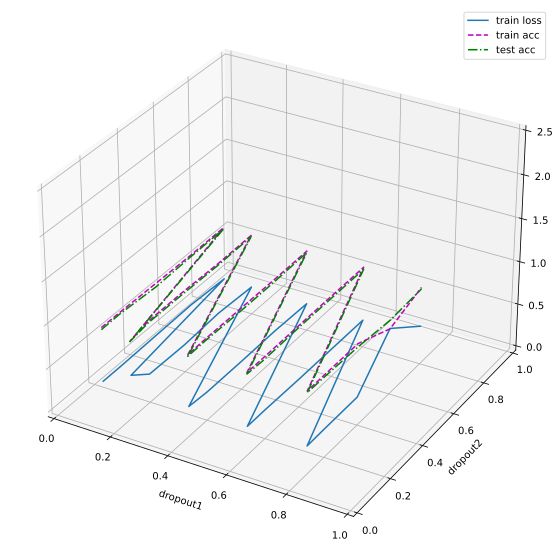

In [10]:
num_epochs, lr, batch_size, = 10, .5, 256
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = tf.keras.optimizers.SGD(learning_rate=lr)
dropout_losses = []
droput_indices = []
for dropout1 in [0.1, .2, .4, .6, .8]:
    for dropout2 in [0.1, .2, .4, .6, .8]:
        droput_indices.append((dropout1,dropout2))
        train_acc, test_acc, train_loss = train_ch3( train_iter, test_iter, loss, num_epochs, trainer, dropout1, dropout2)
        train_metrics = train_loss, train_acc 
        animator.add(dropout1,dropout2, train_metrics + (test_acc , ))  
        dropout_losses.append((train_loss,train_acc,test_acc))

In [11]:
index = pd.MultiIndex.from_tuples(droput_indices, names = ["dropout1", "dropout2"])

In [12]:
dropout_losses = pd.DataFrame(dropout_losses, index = index, columns=["train_loss","train_acc","test_acc"])
dropout_losses

train_loss  train_acc  test_acc
dropout1 dropout2                                 
0.1      0.1         0.273067   0.895600    0.8720
         0.2         0.275177   0.896750    0.8782
         0.4         0.288153   0.891483    0.8502
         0.6         0.300199   0.887100    0.8691
         0.8         0.277632   0.894967    0.8811
0.2      0.1         0.446395   0.838033    0.8375
         0.2         0.280015   0.893683    0.8755
         0.4         0.271298   0.898433    0.8759
         0.6         0.300075   0.887250    0.8688
         0.8         0.274627   0.895383    0.8807
0.4      0.1         0.294928   0.889633    0.8726
         0.2         0.274563   0.896100    0.8764
         0.4         0.274254   0.895417    0.8662
         0.6         0.281553   0.893567    0.8674
         0.8         0.268094   0.898417    0.8812
0.6      0.1         0.279852   0.894467    0.8777
         0.2         0.280981   0.894000    0.8649
         0.4         0.272102   0.897900    0.8756
         0.6         0.271103   0.899317    0.8754
         0.8         0.269066   0.898450    0.8746
0.8      0.1         0.271889   0.896600    0.8780
         0.2         0.275258   0.896000    0.8734
         0.4         0.277013   0.894517    0.8561
         0.6         0.718655   0.714917    0.8153
         0.8         0.397391   0.854217    0.8369